# Income Predictor
Goal: Predict whether someone makes over 50k or below 50k
### Description

In [1]:
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer
warnings.filterwarnings("ignore") 

## Load data for training / testing

In [2]:
def load_data(path):
    return pd.read_csv(path)

In [41]:
df_train = load_data('../data/au_train.csv')
df_test = load_data('../data/au_test.csv')
print(sorted(df_test['native-country'].unique()))
print(sorted(df_train['native-country'].unique()))

[' ?', ' Cambodia', ' Canada', ' China', ' Columbia', ' Cuba', ' Dominican-Republic', ' Ecuador', ' El-Salvador', ' England', ' France', ' Germany', ' Greece', ' Guatemala', ' Haiti', ' Honduras', ' Hong', ' Hungary', ' India', ' Iran', ' Ireland', ' Italy', ' Jamaica', ' Japan', ' Laos', ' Mexico', ' Nicaragua', ' Outlying-US(Guam-USVI-etc)', ' Peru', ' Philippines', ' Poland', ' Portugal', ' Puerto-Rico', ' Scotland', ' South', ' Taiwan', ' Thailand', ' Trinadad&Tobago', ' United-States', ' Vietnam', ' Yugoslavia']
[' ?', ' Cambodia', ' Canada', ' China', ' Columbia', ' Cuba', ' Dominican-Republic', ' Ecuador', ' El-Salvador', ' England', ' France', ' Germany', ' Greece', ' Guatemala', ' Haiti', ' Holand-Netherlands', ' Honduras', ' Hong', ' Hungary', ' India', ' Iran', ' Ireland', ' Italy', ' Jamaica', ' Japan', ' Laos', ' Mexico', ' Nicaragua', ' Outlying-US(Guam-USVI-etc)', ' Peru', ' Philippines', ' Poland', ' Portugal', ' Puerto-Rico', ' Scotland', ' South', ' Taiwan', ' Thailan

## Exploratory Data Analysis
While some information was provided on the set of instructions for this project, there have been countless times I've found discrepencies between the documentation for the dataset and the dataset itself. Even if all looks good, it is always helpful to visualize the distribution of each column to make sure there is not any incorrect data or outliers.

In [4]:
print("Number of columns in the dataset: {}".format(len(df_train.columns)))
print("Columns names:", list(df_train.columns))

Number of columns in the dataset: 15
Columns names: ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'class']


In [5]:
# check for null values
print(df_train.isnull().any())

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
class             False
dtype: bool


In [6]:
# print out general statistics for the numerical predictors
df_train.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
def boxplot(df, num_columns, num_rows, l):
    '''
    Input: df (dataframe), num_columns (how many columns you would like in your resulting figure),
           num_rows (how many rows you would like in your resulting figure), l (relevant column names)
    Output: Boxplot of distribution for the relevant columns, l
    '''
    plt.figure(figsize=(num_columns*2,5*num_rows))
    for i in range(0,len(l)):
        plt.subplot(num_rows + 1,num_columns,i+1)
        sns.set_style('whitegrid')
        sns.boxplot(y=df[l[i]], color='seagreen')
        plt.tight_layout()

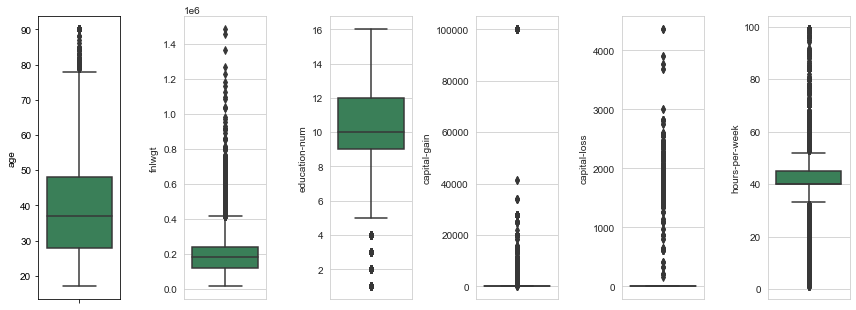

In [8]:
#l = df_train. #selecting the first few numerical columns in the dataset
l = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
number_of_columns = len(l)
number_of_rows = int(len(l) - 1 / number_of_columns)

boxplot(df_train, number_of_columns, number_of_rows, l)

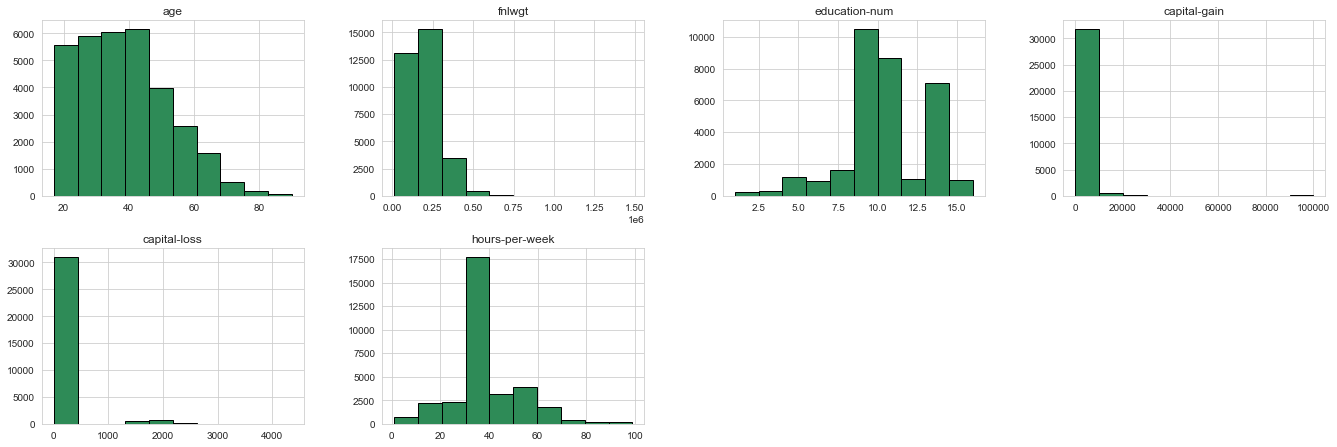

In [9]:
# plotting numerical predictors
subplot = df_train.hist(layout=(5,4), figsize=(23,20), color='seagreen', edgecolor='black')

In [10]:
def kde(df, number_of_columns, number_of_rows, l):
    '''
    '''
    plt.figure(figsize=(number_of_columns*2,5*number_of_rows))
    for i in range(0,len(l)):
        plt.subplot(number_of_rows + 1,number_of_columns,i+1)
        sns.set_style('whitegrid')
        sns.distplot(df[l[i]], kde=True, color='seagreen')
        plt.tight_layout()

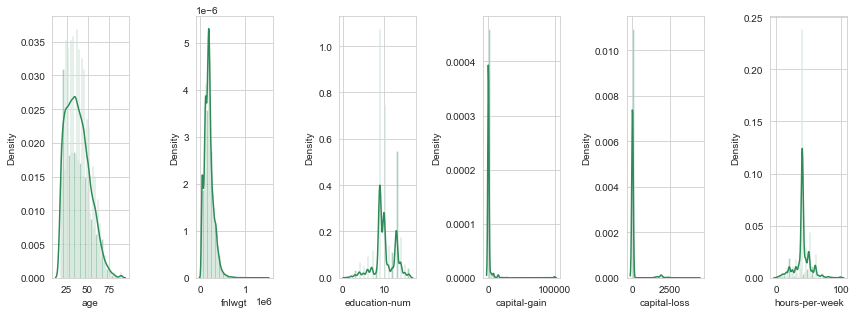

In [11]:
#l = df.columns.values[2:8] #selecting the first few numerical columns in the dataset
number_of_columns=len(l)
number_of_rows = int(len(l) - 1 / number_of_columns)

kde(df_train, number_of_columns, number_of_rows, l)

### Examining correlation between numerical features

In [12]:
df_train.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


<AxesSubplot:>

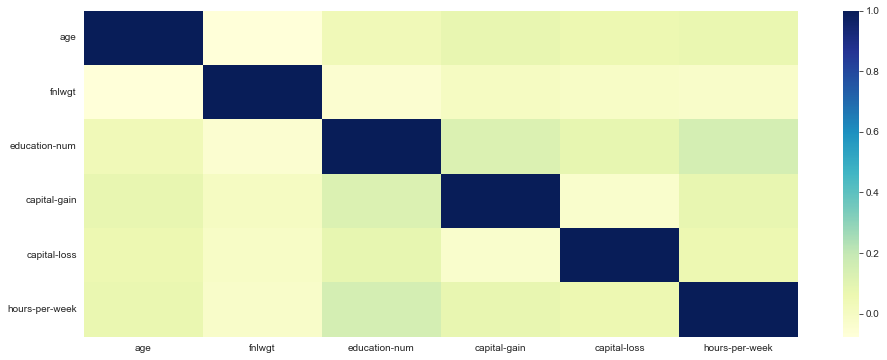

In [13]:
plt.figure(figsize=(16,6))
sns.heatmap(df_train.corr(), cmap="YlGnBu")

### Examining categorical features

In [14]:
def plot_distribution(df, preds):
    '''
    Plots distribution of categorical variables
    '''
    fig, axes = plt.subplots(1, len(preds), figsize=(20, len(preds)))
    for i, pred in enumerate(preds):
        df[pred].value_counts().plot(ax=axes[i], kind='bar', grid=True, title=pred, rot=75, color='seagreen')

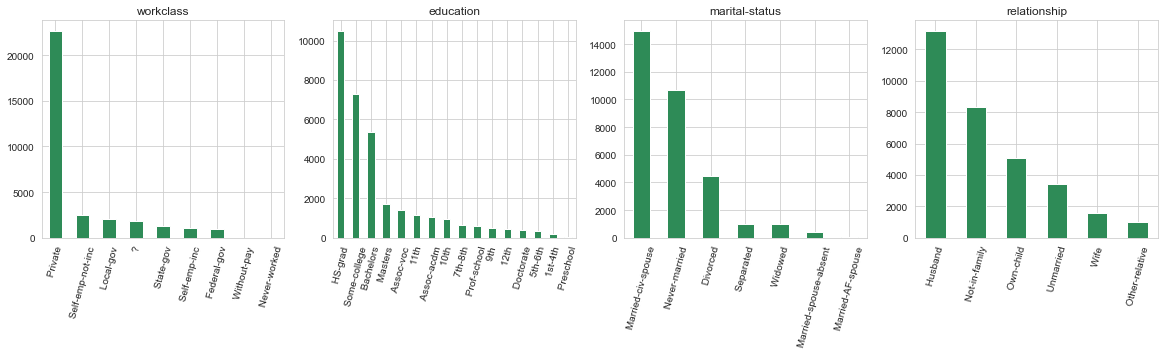

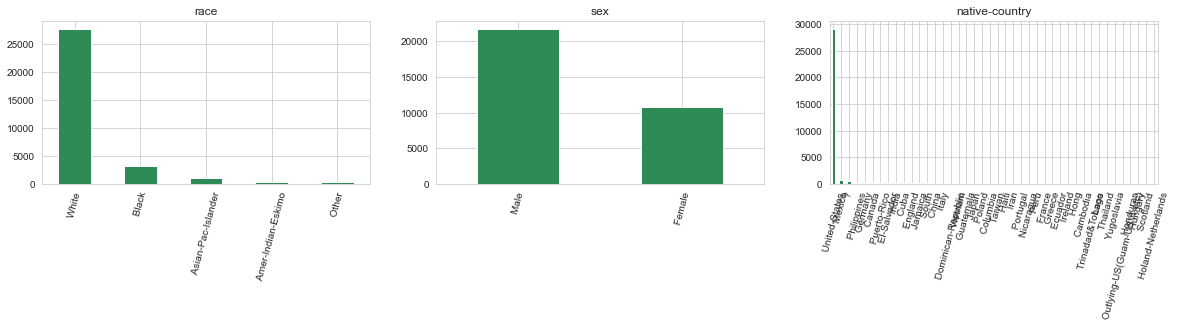

In [15]:
plot_distribution(df_train, ['workclass', 'education', 'marital-status', 'relationship'])
plot_distribution(df_train, ['race', 'sex', 'native-country'])

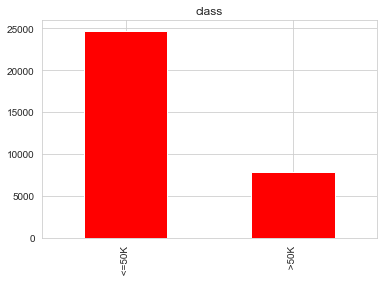

In [16]:
# plotting target variable distribution
plt = df_train['class'].value_counts().plot(kind='bar', grid=True, title="class", color="red")

## Feature Engineering

In [17]:
# might want to scale the numerical data
#from sklearn import preprocessing
#df_scaled = preprocessing.scale(df_train)
#df_train_scaled = pd.DataFrame(df_scaled, columns=df_train.columns)

In [18]:
def one_hot_encode(df, columns):
    '''
    Handles categorical inputs by creating a binary feature for each possible category,
    assigning a value of 1 for the feature that corresponds to the original category and 0
    for the remaining
    '''
    return pd.get_dummies(df, columns=columns)

In [19]:
def binarize_lbls(labels):
    '''
    '''
    lb = LabelBinarizer()
    return pd.DataFrame(lb.fit_transform(labels), columns=['class'])

In [37]:
# converting categorical values to numerical values
categorical_columns = ['workclass', 'education', 'marital-status', 'relationship', 'race', 'sex', 'native-country', 'occupation']
df_train_encoded = one_hot_encode(df_train, categorical_columns)
df_train_encoded.columns = map(str.lower, df_train_encoded.columns)

df_test_encoded = one_hot_encode(df_test, categorical_columns)
df_test_encoded.columns = map(str.lower, df_test_encoded.columns)

# dropping labels from feature set
x_train = df_train_encoded.drop(['class'], axis=1)
s_train = set(list(x_train.columns))
print('\n')
x_test = df_test_encoded.drop(['class'], axis=1)
s_test = set(list(x_test.columns))

print(s_train.difference(s_test))




{'native-country_ holand-netherlands'}


In [21]:
y_train = binarize_lbls(df_train['class'])
y_test = binarize_lbls(df_test['class'])

In [22]:
#print(df_train)

###### In the test set, there is no one that is from Holand-Netherlands and that is throwing the model off because this existed in training
Adding this column to the x_test


In [45]:
x_test['native-country_ holand-netherlands'] = 0

## Building model

In [23]:
import keras

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
model = RandomForestClassifier(verbose=1)
model.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.4s finished


RandomForestClassifier(verbose=1)

In [47]:
feature_importances = pd.DataFrame(model.feature_importances_, index = x_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances[:10]

,importance
fnlwgt,0.163640
age,0.150535
capital-gain,0.094892
hours-per-week,0.084470
education-num,0.068563
marital-status_ married-civ-spouse,0.056218
relationship_ husband,0.051930
capital-loss,0.030109
occupation_ exec-managerial,0.016998
marital-status_ never-married,0.016926


In [48]:
model.score(x_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


0.8505620047908605